# Example for reading depth data file

In [1]:
import zlib
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
depth_path = '2021_11_22_13_32_54_Depth'

# Depth data parameters
w = 640
w = 256
h = 480 #
h = 360
h = 192

### Read and decompress the depth data

In [3]:
with open(depth_path, 'rb') as f:
    data = zlib.decompress(f.read(), -15)

In [4]:
FRAME_COUNT = int(len(data) / w / h / 4)
print(FRAME_COUNT)

67


### Convert bytes to numpy array and set NaNs to zero

In [5]:
frames = np.frombuffer(data, np.float32).reshape(FRAME_COUNT,h,w).copy()
frames = np.nan_to_num(frames, 0)


### Preprocess data for visualization

In [6]:
maxim = frames.max()
imgs = (frames / maxim * 255.0).astype('uint8')

### Show one frame

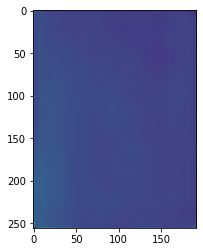

In [9]:
plt.imshow(np.flip(imgs[5,:,:].T, axis=1))

### Write depth video to a  file

In [64]:
# FPS = 30 # TODO: figure out the correct fps
# fourcc = cv2.VideoWriter_fourcc(*'mpv4')
# out = cv2.VideoWriter('depth_video.mp4',fourcc, FPS, (h,w))

# for i in range(FRAME_COUNT):
#     out.write(cv2.cvtColor(np.flip(imgs[i,:,:].T, axis=1), cv2.COLOR_GRAY2BGR))

# out.release()

OpenCV: FFMPEG: tag 0x3476706d/'mpv4' is not found (format 'mp4 / MP4 (MPEG-4 Part 14)')'
